In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import os
from collections import Counter
import requests
import json

# Google API Key
from api_keys import gkey

In [2]:
#setting background of figure black
plt.style.use('ggplot')

In [3]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [15.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

## Looking for 2012 US census data

In [ ]:
# 2012 census data for all US zipcodes
#reading 2012 combined census data
path_comb_2012=os.path.join('output_census', 'census_comb_2012.csv')
usa_2012=pd.read_csv(path_comb_2012)

In [ ]:
#looking for usa_2012 dataframe
usa_2012.head()

In [ ]:
#columns of 2012  dataframe
usa_2012.columns

In [ ]:
#shape of the dataframe
usa_2012.shape

In [ ]:
#removing the rows with house value less than 1
usa_2012=(usa_2012[(usa_2012['House Value']>0)&
                (usa_2012['Household Income']>0)&
                (usa_2012['Monthly Owner Cost']>0)])

In [ ]:
#looking for null value
usa_2012.isna().sum()

In [ ]:
#removing the rows with lat and lng missing value
usa_2012.dropna(subset=['Lat', 'Lng', 
                        'Public Transport Rate',
                        'Personal Transport Rate','Per Capita Income'], 
                         inplace=True)

In [ ]:
#shape of the clean dataframe
usa_2012.shape

In [ ]:
#info of the dataframe
usa_2012.info()

In [ ]:
#describing the dataframe
usa_2012.describe()

## Looking for 2012 California census data

In [33]:
#reading 2012 combined california census data
path_ca_2012=os.path.join('output_census', 'census_ca_2012.csv')
ca_2012=pd.read_csv(path_ca_2012)

In [34]:
#looking for ca_2012 dataframe
ca_2012.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,54480.0,26.5,35658.0,11452.0,30.473568,4.495228,263100.0,1950.0,1650.0,...,69.799927,9.117107,89.864170,0.150514,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,48613.0,25.4,32299.0,11323.0,32.371999,3.762368,238300.0,1952.0,1801.0,...,59.214613,27.157345,71.927262,0.154280,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,67226.0,26.5,29174.0,10041.0,38.724601,5.703151,248400.0,1951.0,1834.0,...,37.219231,25.806979,72.635587,0.191890,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,62884.0,35.5,38430.0,26497.0,22.566949,7.552001,818400.0,1950.0,3636.0,...,34.245595,3.003944,50.025444,26.238789,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39592.0,34.0,32086.0,18688.0,26.581128,6.483633,664400.0,1954.0,3150.0,...,23.262275,5.698121,55.094464,30.703172,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [35]:
#columns of 2012  dataframe
ca_2012.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language Rate',
       'Spanish Language Rate', 'White Population Rate',
       'Black Population Rate', 'Hispanic Population Rate',
       'Asian Population Rate', 'City', 'County', 'Lat', 'Lng',
       'Housing_units', 'State'],
      dtype='object')

In [36]:
#shape of the dataframe
ca_2012.shape

(1763, 30)

In [37]:
#removing the rows with house value less than 1
#removing the rows with house value less than 1
ca_2012=(ca_2012[(ca_2012['House Value']>0)&
                (ca_2012['Household Income']>0)&
                (ca_2012['Monthly Owner Cost']>0)])

In [38]:
#looking for null value
ca_2012.isna().sum()

Zipcode                        0
Population                     0
Median Age                     0
Household Income               0
Per Capita Income              0
Poverty Rate                   0
Unemployment Rate              0
House Value                    0
House Construction Year        0
Monthly Owner Cost             0
Monthly Rent                   0
Public Transport Rate          2
Personal Transport Rate        2
Commute Time Public         1031
Commute Time Car            1031
High School Rate               0
College Rate                   0
Uneducated Rate                0
English Language Rate          0
Spanish Language Rate          0
White Population Rate          0
Black Population Rate          0
Hispanic Population Rate       0
Asian Population Rate          0
City                           0
County                         0
Lat                            0
Lng                            0
Housing_units                  0
State                          0
dtype: int

In [39]:
#removing the rows with lat and lng missing value
ca_2012.dropna(subset=['Public Transport Rate',
                        'Personal Transport Rate'], inplace=True)

In [40]:
#shape of the clean dataframe
ca_2012.shape

(1614, 30)

In [42]:
#converting minutes to hour

ca_2012['Commute Time Public']=ca_2012['Commute Time Public']/60
ca_2012['Commute Time Car']=ca_2012['Commute Time Car']/60

In [43]:
#converting to int
ca_2012['Population']=ca_2012['Population'].astype(int)

In [44]:
#info of the dataframe
ca_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 0 to 1762
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1614 non-null   int64  
 1   Population                1614 non-null   int64  
 2   Median Age                1614 non-null   float64
 3   Household Income          1614 non-null   float64
 4   Per Capita Income         1614 non-null   float64
 5   Poverty Rate              1614 non-null   float64
 6   Unemployment Rate         1614 non-null   float64
 7   House Value               1614 non-null   float64
 8   House Construction Year   1614 non-null   float64
 9   Monthly Owner Cost        1614 non-null   float64
 10  Monthly Rent              1614 non-null   float64
 11  Public Transport Rate     1614 non-null   float64
 12  Personal Transport Rate   1614 non-null   float64
 13  Commute Time Public       583 non-null    float64
 14  Commute 

In [45]:
#describing the dataframe
ca_2012.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language Rate,Spanish Language Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1.614000e+03,1.614000e+03,1614.000000,...,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,93624.332094,23064.425651,39.347150,63131.840768,31296.405824,14.652107,5.489407,4.036223e+05,-1.237188e+06,2235.014870,...,1.251198,62.655545,20.690542,71.080566,4.272956,29.669845,9.240681,36.364147,-119.910979,8459.030359
std,1814.248474,21424.881218,8.703264,27887.917110,17010.388260,9.803986,2.858270,2.391080e+05,2.872430e+07,772.992932,...,1.418891,22.771717,19.917147,19.355402,7.386628,24.271513,12.400638,2.417571,2.113472,7227.451074
min,90001.000000,29.000000,17.900000,12358.000000,6599.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,250.000000,...,0.000000,1.746217,0.000000,5.793502,0.000000,0.000000,0.000000,32.550000,-124.300000,41.000000
25%,92242.250000,2808.750000,32.800000,43036.750000,20182.000000,7.405339,3.926326,2.240250e+05,1.964000e+03,1656.000000,...,0.224881,46.520504,5.659635,59.401981,0.449385,10.475129,1.098030,34.050000,-121.857500,1424.750000
50%,93644.500000,19514.500000,38.300000,56849.000000,27302.000000,12.317756,5.182877,3.436000e+05,1.974000e+03,2146.000000,...,0.852605,65.819078,13.353677,75.241035,1.870798,21.573205,4.538024,36.630000,-120.032500,7379.000000
75%,95355.750000,36954.500000,44.700000,77486.500000,38053.000000,19.845574,6.760246,5.349000e+05,1.981000e+03,2712.000000,...,1.803581,81.380132,30.788091,86.482747,4.881873,43.870521,11.727047,38.200000,-118.072500,13759.500000
max,96161.000000,105603.000000,76.200000,224423.000000,167439.000000,75.862069,28.658537,1.000001e+06,2.005000e+03,4001.000000,...,11.864407,100.000000,86.434109,100.000000,86.251343,100.000000,70.586701,41.940000,-114.300000,37182.000000


In [46]:
#selecting only important columns
ca_12=ca_2012[['City','Population', 'House Value','Household Income',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Uneducated Rate' ]]

In [47]:
#only selecting rows with +ve owner cost and rent
ca_12=(ca_12[(ca_12['Monthly Owner Cost']>0)&
             (ca_12['Monthly Rent']>0)])

In [48]:
ca_12.shape

(1547, 10)

In [ ]:
#formating columns with 2 decimal place
ca_12[['House Value','Household Income',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Commute Time Public', 'Commute Time Car', 
       'Uneducated Rate' ]]=(ca_12[[ 'House Value','Household Income',
                                   'Poverty Rate', 'Unemployment Rate',
                                     'Monthly Owner Cost', 'Monthly Rent',
                                    'Public Transport Rate', 'Commute Time Public',
                                     'Commute Time Car', 'Uneducated Rate']]
                                                   .applymap('{:.2f}'.format))

In [49]:
#using groupby method to groupby the data accordint to city
ca_12_city=ca_12.groupby('City').agg({'Population':'sum',
                              'House Value':'mean',
                               'Household Income':'mean',
                               'Poverty Rate':'mean',
                               'Unemployment Rate':'mean',
                               'Monthly Owner Cost':'mean',
                               'Monthly Rent':'mean',
                               'Public Transport Rate':'mean',
                               'Uneducated Rate':'mean'}).reset_index()

In [51]:
#sorting data according to the population
ca_12_city=ca_12_city.sort_values(by=['House Value',
                                'Monthly Owner Cost','Household Income',
                                'Poverty Rate','Unemployment Rate',
                                'Public Transport Rate','Monthly Rent', 
                                'Uneducated Rate' ], ascending=False)

In [52]:
#printing the new sorted datasets
ca_12_city.head()

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
43,Atherton,7083,1000001.0,218214.0,4.828463,3.091910,4001.0,2001.0,0.050671,0.112946
703,Portola Valley,6633,1000001.0,162271.0,1.778984,1.778984,4001.0,2001.0,0.018170,0.241218
490,Los Altos,41846,1000001.0,160492.5,2.737687,2.746366,4001.0,1994.0,0.029248,0.066560
596,Nicasio,532,1000001.0,158333.0,7.518797,1.879699,4001.0,981.0,0.063371,0.000000
811,Saratoga,30533,1000001.0,156762.0,3.602659,3.098287,4001.0,2001.0,0.004521,0.291488


In [53]:
#city with higher house value
ca_12_city.nlargest(10, 'House Value')

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
43,Atherton,7083,1000001.0,218214.0,4.828463,3.091910,4001.0,2001.0,0.050671,0.112946
703,Portola Valley,6633,1000001.0,162271.0,1.778984,1.778984,4001.0,2001.0,0.018170,0.241218
490,Los Altos,41846,1000001.0,160492.5,2.737687,2.746366,4001.0,1994.0,0.029248,0.066560
596,Nicasio,532,1000001.0,158333.0,7.518797,1.879699,4001.0,981.0,0.063371,0.000000
811,Saratoga,30533,1000001.0,156762.0,3.602659,3.098287,4001.0,2001.0,0.004521,0.291488
595,Newport Coast,10136,1000001.0,154970.0,4.469219,2.180347,4001.0,2001.0,0.009491,0.217048
424,La Canada Flintridge,20468,1000001.0,154331.0,2.086183,2.735978,4001.0,2001.0,0.014694,0.268712
651,Palos Verdes Peninsula,25387,1000001.0,150395.0,2.497341,1.729231,4001.0,2001.0,0.007680,0.133927
8,Alamo,15817,1000001.0,149973.0,3.123222,2.048429,4001.0,2001.0,0.112345,0.335083
640,Pacific Palisades,22893,1000001.0,148984.0,4.442406,4.621500,4001.0,2001.0,0.028473,0.135413


In [54]:
#City with smallest poverty rate
ca_12_city.nsmallest(10, 'Poverty Rate')

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
178,Clements,892,828600.0,107697.0,0.000000,0.000000,1889.0,806.0,0.000000,0.000000
574,Mount Hermon,202,434800.0,60556.0,0.000000,4.950495,1163.0,798.0,0.000000,0.000000
839,Soda Springs,352,362200.0,41250.0,0.000000,23.011364,2608.0,833.0,0.000000,0.000000
346,Guinda,605,342300.0,78029.0,0.000000,4.462810,3153.0,2001.0,0.000000,3.140496
280,Fawnskin,644,319500.0,38240.0,0.000000,20.496894,2262.0,1394.0,0.000000,0.000000
834,Skyforest,181,286500.0,99063.0,0.000000,0.000000,1535.0,1068.0,0.000000,0.000000
698,Port Costa,361,275000.0,92743.0,0.000000,0.000000,2674.0,786.0,0.000000,0.000000
794,San Simeon,579,243500.0,51089.0,0.000000,2.590674,1424.0,1087.0,0.000000,0.000000
558,Montara,2567,726600.0,119537.0,0.077912,1.480327,2723.0,1735.0,0.086595,0.000000
462,Lee Vining,581,243100.0,43359.0,0.516351,0.860585,1216.0,891.0,0.000000,9.122203


In [55]:
#city with smallest unemployment rate
ca_12_city.nsmallest(10, 'Unemployment Rate')

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
864,Stinson Beach,525,1000001.0,80114.0,6.857143,0.0,2439.0,2001.0,0.103842,0.000000
775,San Geronimo,539,849500.0,98221.0,5.751391,0.0,3330.0,2001.0,0.095511,0.000000
178,Clements,892,828600.0,107697.0,0.000000,0.0,1889.0,806.0,0.000000,0.000000
897,The Sea Ranch,762,794200.0,57400.0,4.724409,0.0,2266.0,1424.0,0.077882,0.000000
24,Angelus Oaks,312,766700.0,76875.0,8.653846,0.0,4001.0,1333.0,0.000000,0.000000
49,Avila Beach,913,490900.0,69186.0,4.052574,0.0,2742.0,1030.0,0.000000,0.000000
333,Graton,903,474600.0,71747.0,9.966777,0.0,2046.0,1608.0,0.000000,2.436323
669,Petrolia,312,471400.0,35556.0,16.025641,0.0,1363.0,661.0,0.000000,0.000000
174,Clarksburg,1056,457100.0,54167.0,10.984848,0.0,2435.0,1440.0,0.000000,2.178030
309,Fulton,727,450000.0,48750.0,39.752407,0.0,2769.0,989.0,0.000000,0.000000


In [ ]:
#city with larger commute time
#ca_12_city.nsmallest(10, 'Commute Time Car')

In [56]:
#city with smallest monthly owner cost
ca_12_city.nsmallest(10, 'Monthly Owner Cost')

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
222,Death Valley,263,26100.0,44327.0,4.942966,1.140684,250.0,496.0,0.000000,0.000000
722,Redcrest,319,239300.0,35625.0,10.658307,0.000000,588.0,680.0,0.000000,0.000000
982,Winterhaven,2807,58900.0,26322.0,38.795867,8.300677,617.0,508.0,0.019789,3.277520
216,Daggett,1253,54700.0,33846.0,29.848364,10.534717,658.0,592.0,0.000000,1.197127
82,Biola,373,64000.0,23750.0,16.890080,0.000000,667.0,611.0,0.000000,0.000000
77,Big Bend,116,52500.0,23500.0,50.000000,6.034483,683.0,537.0,0.303030,0.000000
660,Paynes Creek,355,92700.0,17875.0,28.169014,3.943662,697.0,809.0,0.000000,0.845070
956,Weldon,2090,87400.0,29609.0,30.956938,4.593301,699.0,551.0,0.039494,0.000000
26,Annapolis,298,1000001.0,43125.0,8.724832,4.697987,757.0,545.0,0.000000,0.000000
423,Kyburz,93,206300.0,48125.0,7.526882,1.075269,788.0,719.0,0.000000,0.000000


In [57]:
#city with largest household income
ca_12_city.nlargest(10, 'Household Income')

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
43,Atherton,7083,1000001.0,218214.0,4.828463,3.091910,4001.0,2001.0,0.050671,0.112946
703,Portola Valley,6633,1000001.0,162271.0,1.778984,1.778984,4001.0,2001.0,0.018170,0.241218
632,Orinda,17779,983100.0,161567.0,1.479273,1.794252,3888.0,2001.0,0.242662,0.000000
490,Los Altos,41846,1000001.0,160492.5,2.737687,2.746366,4001.0,1994.0,0.029248,0.066560
596,Nicasio,532,1000001.0,158333.0,7.518797,1.879699,4001.0,981.0,0.063371,0.000000
811,Saratoga,30533,1000001.0,156762.0,3.602659,3.098287,4001.0,2001.0,0.004521,0.291488
595,Newport Coast,10136,1000001.0,154970.0,4.469219,2.180347,4001.0,2001.0,0.009491,0.217048
424,La Canada Flintridge,20468,1000001.0,154331.0,2.086183,2.735978,4001.0,2001.0,0.014694,0.268712
942,Villa Park,5809,978600.0,153462.0,2.788776,3.993803,4001.0,2001.0,0.006703,0.550869
908,Trabuco Canyon,33548,734950.0,150402.5,1.822477,1.602894,3339.5,2001.0,0.001220,0.049949


## Plotting 2012 california data

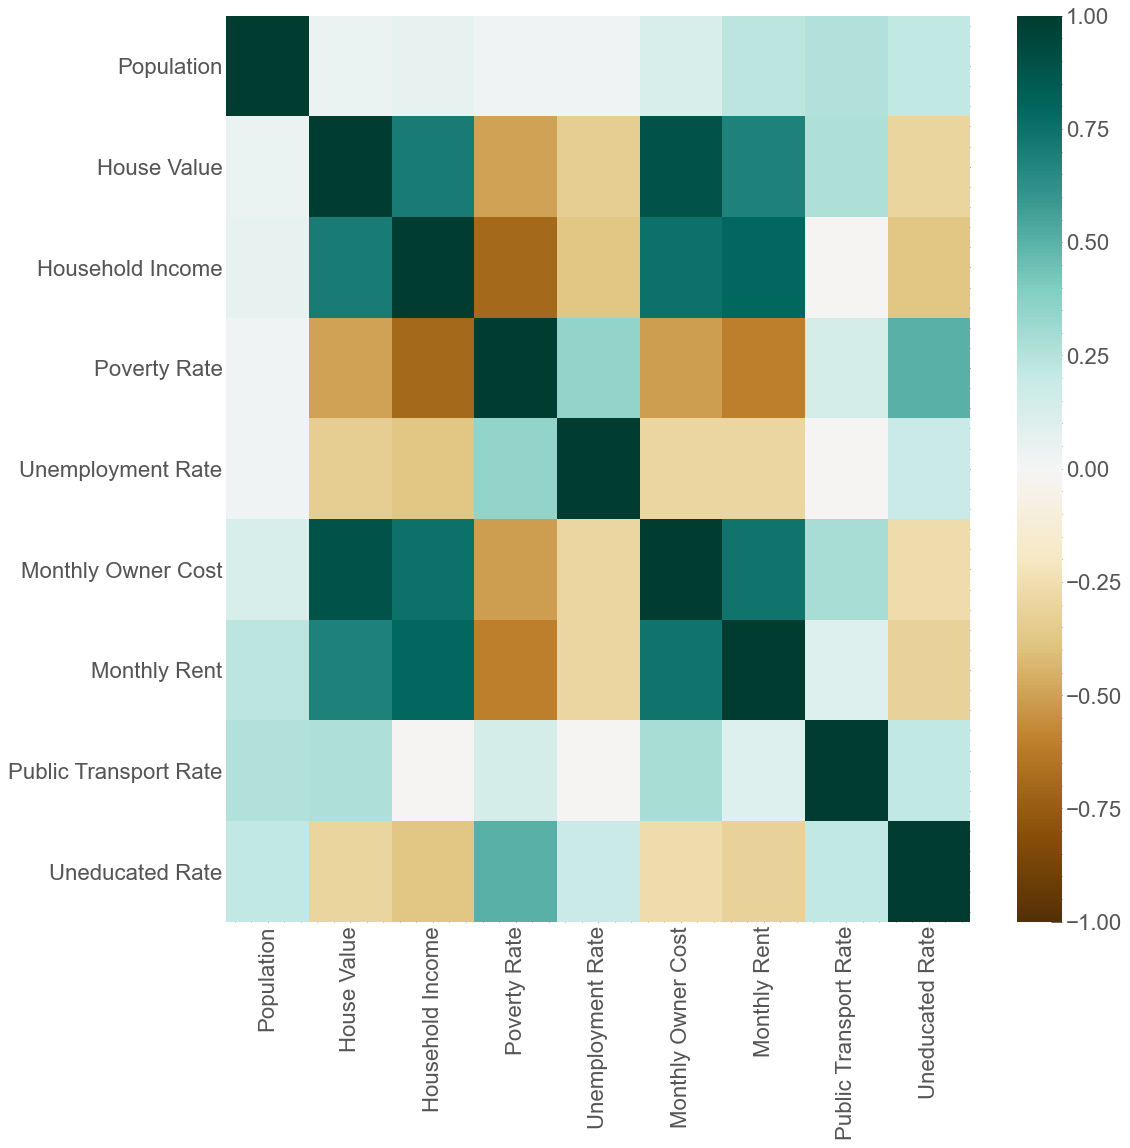

In [58]:
#plotting all correlation using seaborn heatmap
corr_12=ca_12.corr()
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_12,vmin=-1, vmax=1, ax=ax, cmap='BrBG')#annot=True,
plt.show()

In [ ]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.4, 
                s=ca_2012['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('rainbow'),
                colorbar=True, ax=ax)

plt.show()

In [ ]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.3, 
                s=ca_2012['Population']/100,label='Population',
                 c='Household Income', cmap=plt.get_cmap('hsv'),
                colorbar=True, ax=ax)

plt.show()

## Looking for 2014 US census data

In [ ]:
# 2014 census data for all US zipcodes
#reading 2014 combined census data
path_comb_2014=os.path.join('output_census', 'census_comb_2014.csv')
usa_2014=pd.read_csv(path_comb_2014)

In [ ]:
#looking for usa_2014 dataframe
usa_2014.head()

In [ ]:
#columns of 2014  dataframe
usa_2014.columns

In [ ]:
#shape of the dataframe
usa_2014.shape

In [ ]:
#removing the rows with house value less than 1
usa_2014=usa_2014[usa_2014['House Value']>0]

In [ ]:
#looking for null value
usa_2014.isna().sum()

In [ ]:
#removing the rows with lat and lng missing value
usa_2014.dropna(subset=['Lat', 'Lng', 
                        'Public Transport Rate',
                        'Personal Transport Rate',
                        'Housing_units','County'], inplace=True)

In [ ]:
#shape of the clean dataframe
usa_2014.shape

In [ ]:
#info of the dataframe
usa_2014.info()

In [ ]:
#describing the dataframe
usa_2014.describe()

## Looking for 2014 California census data

In [ ]:
#reading 2014 combined california census data
path_ca_2014=os.path.join('output_census', 'census_ca_2014.csv')
ca_2014=pd.read_csv(path_ca_2014)

In [ ]:
#looking for ca_2014 dataframe
ca_2014.head()

In [ ]:
#columns of 2014  dataframe
ca_2014.columns

In [ ]:
#shape of the dataframe
ca_2014.shape

In [ ]:
#removing the rows with house value less than 1
ca_2014=ca_2014[ca_2014['House Value']>0]

In [ ]:
#looking for null value
ca_2014.isna().sum()

In [ ]:
#shape of the clean dataframe
ca_2014.shape

In [ ]:
#info of the dataframe
ca_2014.info()

In [ ]:
#describing the dataframe
ca_2014.describe()

## Looking for 2015 US census data

In [ ]:
# 2015 census data for all US zipcodes
#reading 2015 combined census data
path_comb_2015=os.path.join('output_census', 'census_comb_2015.csv')
usa_2015=pd.read_csv(path_comb_2015)

In [ ]:
#looking for usa_2015 dataframe
usa_2015.head()

In [ ]:
#columns of 2015  dataframe
usa_2015.columns

In [ ]:
#shape of the dataframe
usa_2015.shape

In [ ]:
#removing the rows with house value less than 1
usa_2015=usa_2015[usa_2015['House Value']>0]

In [ ]:
#looking for null value
usa_2015.isna().sum()

In [ ]:
#removing the rows with lat and lng missing value
usa_2015.dropna(subset=['Lat', 'Lng', 'Per Capita Income','County',
                        'Monthly Owner Cost','Monthly Rent',
                        'Public Transport Rate','Household Income',
                        'Personal Transport Rate'], 
                         inplace=True)

In [ ]:
#shape of the clean dataframe
usa_2015.shape

In [ ]:
#info of the dataframe
usa_2015.info()

In [ ]:
#describing the dataframe
usa_2015.describe()

## Looking for 2015 California census data

In [ ]:
#reading 2015 combined california census data
path_ca_2015=os.path.join('output_census', 'census_ca_2015.csv')
ca_2015=pd.read_csv(path_ca_2015)

In [ ]:
#looking for ca_2015 dataframe
ca_2015.head()

In [ ]:
#columns of 2015  dataframe
ca_2015.columns

In [ ]:
#shape of the dataframe
ca_2015.shape

In [ ]:
#removing the rows with house value less than 1
ca_2015=ca_2015[ca_2015['House Value']>0]

In [ ]:
#looking for null value
ca_2015.isna().sum()

In [ ]:
#removing the rows with lat and lng missing value
ca_2015.dropna(subset=['Household Income', 'Monthly Rent', 
                        'Monthly Owner Cost','Personal Transport Rate',
                      'Public Transport Rate'],inplace=True)

In [ ]:
#shape of the clean dataframe
ca_2015.shape

In [ ]:
#info of the dataframe
ca_2015.info()

In [ ]:
#describing the dataframe
ca_2015.describe()

## Looking for 2017 US census data

In [ ]:
# 2017 census data for all US zipcodes
#reading 2017 combined census data
path_comb_2017=os.path.join('output_census', 'census_comb_2017.csv')
usa_2017=pd.read_csv(path_comb_2017)

In [ ]:
#looking for usa_2017 dataframe
usa_2017.head()

In [ ]:
#columns of 20147  dataframe
usa_2017.columns

In [ ]:
#shape of the dataframe
usa_2017.shape

In [ ]:
#removing the rows with house value less than 1
usa_2017=usa_2017[usa_2017['House Value']>0]

In [ ]:
#looking for null value
usa_2017.isna().sum()

In [ ]:
#removing the rows with lat and lng missing value
usa_2017.dropna(subset=['Lat', 'Lng', 'Housing_units','County',
                        'Public Transport Rate','Personal Transport Rate'], 
                         inplace=True)

In [ ]:
#shape of the clean dataframe
usa_2017.shape

In [ ]:
#info of the dataframe
usa_2017.info()

In [ ]:
#describing the dataframe
usa_2017.describe()

## Looking for 2017 California census data

In [ ]:
#reading 2017 combined california census data
path_ca_2017=os.path.join('output_census', 'census_ca_2017.csv')
ca_2017=pd.read_csv(path_ca_2017)

In [ ]:
#looking for usa_2017 dataframe
ca_2017.head()

In [ ]:
#columns of 2017  dataframe
ca_2017.columns

In [ ]:
#shape of the dataframe
ca_2017.shape

In [ ]:
#removing the rows with house value less than 1
ca_2017=ca_2017[ca_2017['House Value']>0]

In [ ]:
#looking for null value
ca_2017.isna().sum()

In [ ]:
#removing the rows with lat and lng missing value


In [ ]:
#shape of the clean dataframe
ca_2017.shape

In [ ]:
#info of the dataframe
ca_2017.info()

In [ ]:
#describing the dataframe
ca_2017.describe()

## Looking for 2019 US census data

In [80]:
# 2019 census data for all US zipcodes
#reading 2019 combined census data
path_comb_2019=os.path.join('output_census', 'census_comb_2019.csv')
usa_2019=pd.read_csv(path_comb_2019)

In [81]:
#looking for usa_2014 dataframe
usa_2019.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,601,17113.0,41.9,14361.0,7493.0,61.660726,11.500029,83900.0,1981,771.0,...,73.721732,1.063519,99.643546,0.011687,Adjuntas,Adjuntas Municipio,NaN,NaN,NaN,PR
1,602,37751.0,42.9,16807.0,9694.0,49.410612,3.761490,85300.0,1978,877.0,...,85.240126,2.405234,92.469074,0.000000,Aguada,Aguada Municipio,18.36,-67.18,18073.0,PR
2,603,47081.0,42.1,16049.0,11259.0,50.319662,6.790425,118400.0,1980,832.0,...,79.350481,3.215735,97.368365,0.229392,Aguadilla,Aguadilla Municipio,18.45,-67.11,25653.0,PR
3,606,6392.0,44.3,12119.0,6093.0,65.472466,2.643930,80800.0,1978,526.0,...,45.525657,1.439299,99.155194,0.000000,Maricao,Maricao Municipio,18.20,-66.90,2877.0,PR
4,610,26686.0,42.7,19898.0,10572.0,45.731844,3.855954,87600.0,1978,751.0,...,82.597617,1.727498,95.061081,0.000000,Anasco,Aasco Municipio,18.28,-67.13,12618.0,PR


In [82]:
#columns of 2014  dataframe
usa_2019.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [83]:
#shape of the dataframe
usa_2019.shape

(33120, 30)

In [84]:
#removing the rows with house value less than 1
usa_2019=(usa_2019[(usa_2019['House Value']>0)&
                (usa_2019['Household Income']>0)&
                (usa_2019['Monthly Owner Cost']>0)])

In [85]:
#looking for null value
usa_2019.isna().sum()

Zipcode                         0
Population                      0
Median Age                      0
Household Income                0
Per Capita Income               0
Poverty Rate                    0
Unemployment Rate               0
House Value                     0
House Construction Year         0
Monthly Owner Cost              0
Monthly Rent                    0
Public Transport Rate           1
Personal Transport Rate         1
Commute Time Public         20708
Commute Time Car            20708
High School Rate                0
College Rate                    0
Uneducated Rate                 0
English Language            28941
Spanish Language            28941
White Population Rate           0
Black Population Rate           0
Hispanic Population Rate        0
Asian Population Rate           0
City                            0
County                          1
Lat                            16
Lng                            16
Housing_units                  16
State         

In [86]:
#removing the rows with lat and lng missing value
usa_2019.dropna(subset=['Lat', 'Lng','Housing_units','County', 
                        'Public Transport Rate','Personal Transport Rate'], 
                         inplace=True)

In [87]:
#shape of the clean dataframe
usa_2019.shape

(28923, 30)

In [88]:
#info of the dataframe
usa_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923 entries, 1 to 33119
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   28923 non-null  int64  
 1   Population                28923 non-null  float64
 2   Median Age                28923 non-null  float64
 3   Household Income          28923 non-null  float64
 4   Per Capita Income         28923 non-null  float64
 5   Poverty Rate              28923 non-null  float64
 6   Unemployment Rate         28923 non-null  float64
 7   House Value               28923 non-null  float64
 8   House Construction Year   28923 non-null  int64  
 9   Monthly Owner Cost        28923 non-null  float64
 10  Monthly Rent              28923 non-null  float64
 11  Public Transport Rate     28923 non-null  float64
 12  Personal Transport Rate   28923 non-null  float64
 13  Commute Time Public       8228 non-null   float64
 14  Commut

In [ ]:
#describing the dataframe
usa_2019.describe()

## Looking for 2019 California census data

In [4]:
#reading 2019 combined california census data
path_ca_2019=os.path.join('output_census', 'census_ca_2019.csv')
ca_2019=pd.read_csv(path_ca_2019)

In [5]:
#looking for usa_2019 dataframe
ca_2019.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [6]:
#columns of 2019  dataframe
ca_2019.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [7]:
#shape of the dataframe
ca_2019.shape

(1763, 30)

In [8]:
#removing the rows with house value less than 1
ca_2019=(ca_2019[(ca_2019['House Value']>0)&
                (ca_2019['Household Income']>0)&
                (ca_2019['Monthly Owner Cost']>0)])

In [10]:
#looking for null value
ca_2019.isna().sum()

Zipcode                        0
Population                     0
Median Age                     0
Household Income               0
Per Capita Income              0
Poverty Rate                   0
Unemployment Rate              0
House Value                    0
House Construction Year        0
Monthly Owner Cost             0
Monthly Rent                   0
Public Transport Rate          0
Personal Transport Rate        0
Commute Time Public          879
Commute Time Car             879
High School Rate               0
College Rate                   0
Uneducated Rate                0
English Language            1524
Spanish Language            1524
White Population Rate          0
Black Population Rate          0
Hispanic Population Rate       0
Asian Population Rate          0
City                           0
County                         0
Lat                            0
Lng                            0
Housing_units                  0
State                          0
dtype: int

In [ ]:
#removing the rows with lat and lng missing value


In [11]:
#shape of the clean dataframe
ca_2019.shape

(1524, 30)

In [12]:
#info of the dataframe
ca_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 1762
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1524 non-null   int64  
 1   Population                1524 non-null   float64
 2   Median Age                1524 non-null   float64
 3   Household Income          1524 non-null   float64
 4   Per Capita Income         1524 non-null   float64
 5   Poverty Rate              1524 non-null   float64
 6   Unemployment Rate         1524 non-null   float64
 7   House Value               1524 non-null   float64
 8   House Construction Year   1524 non-null   int64  
 9   Monthly Owner Cost        1524 non-null   float64
 10  Monthly Rent              1524 non-null   float64
 11  Public Transport Rate     1524 non-null   float64
 12  Personal Transport Rate   1524 non-null   float64
 13  Commute Time Public       645 non-null    float64
 14  Commute 

In [13]:
#describing the dataframe
ca_2019.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language,Spanish Language,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1.524000e+03,1.524000e+03,1524.000000,...,1524.000000,0.0,0.0,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,93551.388451,25684.738189,40.611614,77537.809055,38908.082677,13.451337,3.024182,5.587460e+05,-4.355094e+05,2322.731627,...,1.449499,NaN,NaN,68.316085,4.243917,31.845906,10.564439,36.255445,-119.880488,8937.008530
std,1812.248191,22488.981795,8.727877,35345.775700,21232.262609,8.627880,1.731472,3.837649e+05,1.707723e+07,824.295049,...,1.409539,NaN,NaN,20.167932,6.833948,24.458362,13.440182,2.380148,2.126163,7156.586656
min,90001.000000,72.000000,19.600000,14822.000000,6725.000000,0.000000,0.000000,5.030000e+04,-6.666667e+08,676.000000,...,0.000000,NaN,NaN,7.804813,0.000000,0.000000,0.000000,32.550000,-124.300000,54.000000
25%,92137.000000,4345.000000,34.400000,51620.000000,24642.250000,7.078076,2.042067,2.867250e+05,1.965000e+03,1676.750000,...,0.398612,NaN,NaN,54.586932,0.615790,12.407290,1.593190,34.030000,-121.890000,1993.250000
50%,93611.500000,22742.000000,39.050000,70225.500000,33603.500000,11.384546,2.731415,4.568500e+05,1.975000e+03,2222.000000,...,1.116690,NaN,NaN,72.860144,2.019348,24.671083,5.404212,36.500000,-119.830000,8250.500000
75%,95313.500000,39734.250000,45.400000,95861.500000,47538.500000,17.991466,3.674198,7.152000e+05,1.983000e+03,2851.000000,...,2.090248,NaN,NaN,84.458004,5.060834,47.080246,13.833591,38.050000,-118.047500,14229.000000
max,96161.000000,111165.000000,75.600000,250001.000000,163010.000000,56.655711,18.364832,2.000001e+06,2.011000e+03,4001.000000,...,12.110026,NaN,NaN,100.000000,81.099588,99.424815,75.288276,41.940000,-114.300000,37182.000000


In [60]:
#selecting only important columns
ca_19=ca_2019[['City','Population', 'House Value','Household Income',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate','College Rate','White Population Rate',
       'Uneducated Rate' ]]

In [61]:
#only selecting rows with +ve owner cost and rent
ca_19=(ca_19[(ca_19['Monthly Owner Cost']>0)&
             (ca_19['Monthly Rent']>0)])

In [78]:
#saving csv file for machine learning
ca_19.to_csv('output_census/ca_2019_ml.csv', index=False)

In [ ]:
#formating columns with 2 decimal place
ca_19[['House Value','Household Income',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Commute Time Public', 'Commute Time Car', 
       'Uneducated Rate' ]]=(ca_19[[ 'House Value','Household Income',
                                   'Poverty Rate', 'Unemployment Rate',
                                     'Monthly Owner Cost', 'Monthly Rent',
                                    'Public Transport Rate', 'Commute Time Public',
                                     'Commute Time Car', 'Uneducated Rate']]
                                                   .applymap('{:.2f}'.format))

In [63]:
#using groupby method to groupby the data accordint to city
ca_19_city=ca_19.groupby('City').agg({'Population':'sum',
                              'House Value':'mean',
                               'Household Income':'mean',
                               'Poverty Rate':'mean',
                               'Unemployment Rate':'mean',
                               'Monthly Owner Cost':'mean',
                               'Monthly Rent':'mean',
                               'Public Transport Rate':'mean',
                               'Personal Transport Rate':'mean',
                                'College Rate':'mean',
                                'White Population Rate':'mean',      
                               'Uneducated Rate':'mean'}).reset_index()

In [64]:
#sorting data according to the population
ca_19_city=ca_19_city.sort_values(by=['House Value',
                                'Monthly Owner Cost','Household Income',
                                'Poverty Rate','Unemployment Rate',
                                'Public Transport Rate','Monthly Rent', 
                                'Uneducated Rate' ], ascending=False)

In [65]:
ca_19_city.shape

(913, 13)

In [21]:
#printing the new sorted datasets
ca_19_city.head()

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
686,Ross,1219.0,2000001.0,250001.0,7.301066,2.214930,4001.0,1938.0,15.959596,4.265792
41,Atherton,7415.0,2000001.0,250001.0,3.344572,1.982468,4001.0,3501.0,2.403521,0.364127
446,Los Altos,43081.0,2000001.0,236930.0,3.104511,1.478638,4001.0,3135.5,2.326453,0.293218
643,Portola Valley,7125.0,2000001.0,234091.0,1.431579,1.305263,4001.0,2914.0,0.818505,0.280702
539,Newport Coast,9802.0,2000001.0,204291.0,5.917160,1.101816,4001.0,2623.0,0.000000,0.000000


In [22]:
#city with higher house value
ca_19_city.nlargest(10, 'House Value')

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
686,Ross,1219.0,2000001.0,250001.0,7.301066,2.214930,4001.0,1938.0,15.959596,4.265792
41,Atherton,7415.0,2000001.0,250001.0,3.344572,1.982468,4001.0,3501.0,2.403521,0.364127
446,Los Altos,43081.0,2000001.0,236930.0,3.104511,1.478638,4001.0,3135.5,2.326453,0.293218
643,Portola Valley,7125.0,2000001.0,234091.0,1.431579,1.305263,4001.0,2914.0,0.818505,0.280702
539,Newport Coast,9802.0,2000001.0,204291.0,5.917160,1.101816,4001.0,2623.0,0.000000,0.000000
742,Saratoga,31196.0,2000001.0,193617.0,4.664059,1.689319,4001.0,3098.0,1.156027,0.195538
581,Pacific Palisades,21629.0,2000001.0,192500.0,4.355264,1.733783,4001.0,2537.0,0.753440,0.388367
59,Belvedere Tiburon,12740.0,2000001.0,165807.0,3.092622,2.001570,4001.0,2550.0,16.963332,0.000000
717,San Marino,13375.0,2000001.0,165765.0,6.706542,1.024299,4001.0,3218.0,2.093063,0.328972
484,Menlo Park,43392.0,2000001.0,161827.0,7.151088,1.942754,4001.0,2346.0,6.290406,0.880347


In [25]:
#City with smallest poverty rate
ca_19_city.nsmallest(10, 'Poverty Rate')

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
208,Dillon Beach,254.0,964300.0,119706.0,0.000000,3.937008,3652.0,2700.0,0.000000,0.000000
342,Hood,335.0,450000.0,59524.0,0.000000,0.000000,2613.0,1653.0,0.000000,0.000000
160,Clio,274.0,388900.0,70455.0,0.000000,0.000000,1977.0,946.0,0.000000,0.000000
522,Mountain Ranch,1159.0,310500.0,57689.0,1.121657,1.639344,1898.0,1080.0,0.000000,1.121657
156,Clarksburg,1321.0,656300.0,95000.0,1.211204,2.876609,1875.0,1500.0,0.000000,1.892506
646,Prather,1798.0,363500.0,102824.0,1.279199,1.946607,1842.0,1347.0,0.000000,0.000000
643,Portola Valley,7125.0,2000001.0,234091.0,1.431579,1.305263,4001.0,2914.0,0.818505,0.280702
127,Carmel By The Sea,3316.0,1542700.0,98313.0,1.598311,0.030157,3691.0,2206.0,0.000000,0.000000
157,Clayton,13687.0,754500.0,150032.0,2.089574,2.761745,3274.0,2550.0,9.988741,0.000000
524,Mt Baldy,307.0,458000.0,71042.0,2.280130,0.651466,2088.0,1469.0,0.000000,0.000000


In [ ]:
#city with smallest unemployment rate
ca_19_city.nsmallest(10, 'Unemployment Rate')

In [ ]:
#city with larger commute time
ca_19_city.nsmallest(10, 'Commute Time Car')

In [ ]:
#city with smallest monthly owner cost
ca_19_city.nsmallest(10, 'Monthly Owner Cost')

In [ ]:
#city with largest household income
ca_19_city.nlargest(10, 'Household Income')

## Ploting 2019 California Data

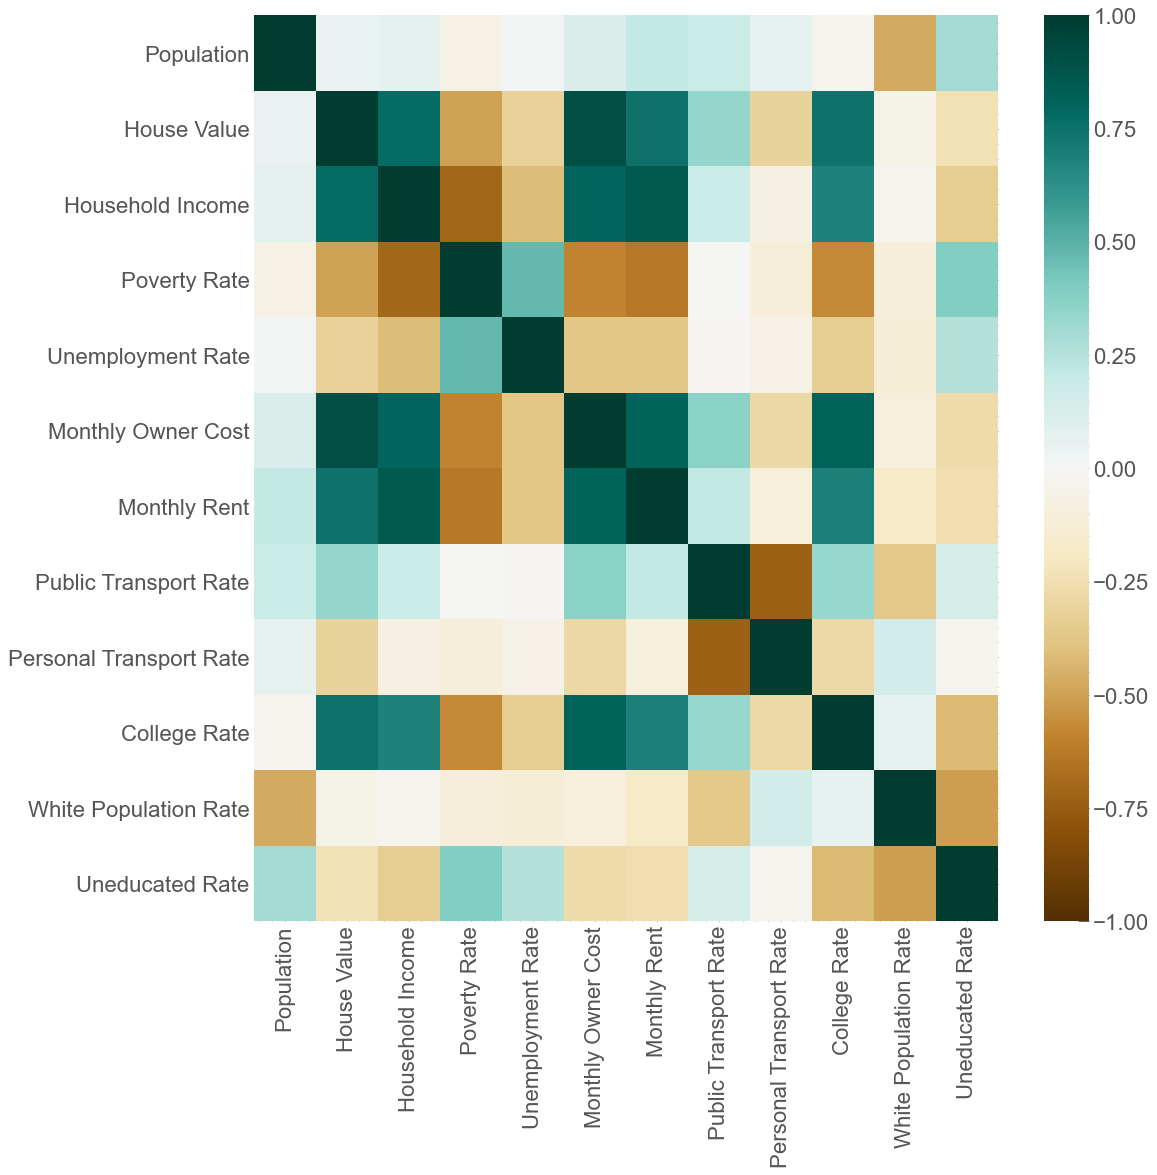

In [66]:
#plotting all correlation using seaborn heatmap
corr_19=ca_19.corr()
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_19,vmin=-1, vmax=1, ax=ax, cmap='BrBG')#annot=True,
plt.show()

In [79]:
corr_19=ca_19.corr()
corr_19.style.background_gradient(cmap='coolwarm')

,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Personal Transport Rate,College Rate,White Population Rate,Uneducated Rate
Population,1.000000,0.049361,0.076296,-0.063826,0.013103,0.119899,0.208828,0.184042,0.056097,-0.028290,-0.473008,0.301868
House Value,0.049361,1.000000,0.779616,-0.496169,-0.319763,0.909525,0.742938,0.340367,-0.306652,0.745137,-0.052931,-0.239669
Household Income,0.076296,0.779616,1.000000,-0.705983,-0.407571,0.800522,0.854344,0.181644,-0.070700,0.681275,-0.023674,-0.339637
Poverty Rate,-0.063826,-0.496169,-0.705983,1.000000,0.469687,-0.586220,-0.640048,-0.000316,-0.111578,-0.574378,-0.106099,0.393409
Unemployment Rate,0.013103,-0.319763,-0.407571,0.469687,1.000000,-0.372284,-0.372955,-0.011195,-0.059724,-0.341559,-0.117507,0.250898
Monthly Owner Cost,0.119899,0.909525,0.800522,-0.586220,-0.372284,1.000000,0.810258,0.372968,-0.287822,0.813098,-0.096190,-0.271458
Monthly Rent,0.208828,0.742938,0.854344,-0.640048,-0.372955,0.810258,1.000000,0.208180,-0.098521,0.689635,-0.172489,-0.253637
Public Transport Rate,0.184042,0.340367,0.181644,-0.000316,-0.011195,0.372968,0.208180,1.000000,-0.729470,0.331277,-0.363668,0.144241
Personal Transport Rate,0.056097,-0.306652,-0.070700,-0.111578,-0.059724,-0.287822,-0.098521,-0.729470,1.000000,-0.273961,0.152738,-0.025430
College Rate,-0.028290,0.745137,0.681275,-0.574378,-0.341559,0.813098,0.689635,0.331277,-0.273961,1.000000,0.063904,-0.416542


In [77]:
c1 = corr_19.abs().unstack()
c1.sort_values(ascending = False)[12:40]

Monthly Owner Cost       House Value                0.909525
House Value              Monthly Owner Cost         0.909525
Household Income         Monthly Rent               0.854344
Monthly Rent             Household Income           0.854344
Monthly Owner Cost       College Rate               0.813098
College Rate             Monthly Owner Cost         0.813098
Monthly Rent             Monthly Owner Cost         0.810258
Monthly Owner Cost       Monthly Rent               0.810258
Household Income         Monthly Owner Cost         0.800522
Monthly Owner Cost       Household Income           0.800522
Household Income         House Value                0.779616
House Value              Household Income           0.779616
                         College Rate               0.745137
College Rate             House Value                0.745137
Monthly Rent             House Value                0.742938
House Value              Monthly Rent               0.742938
Personal Transport Rate 

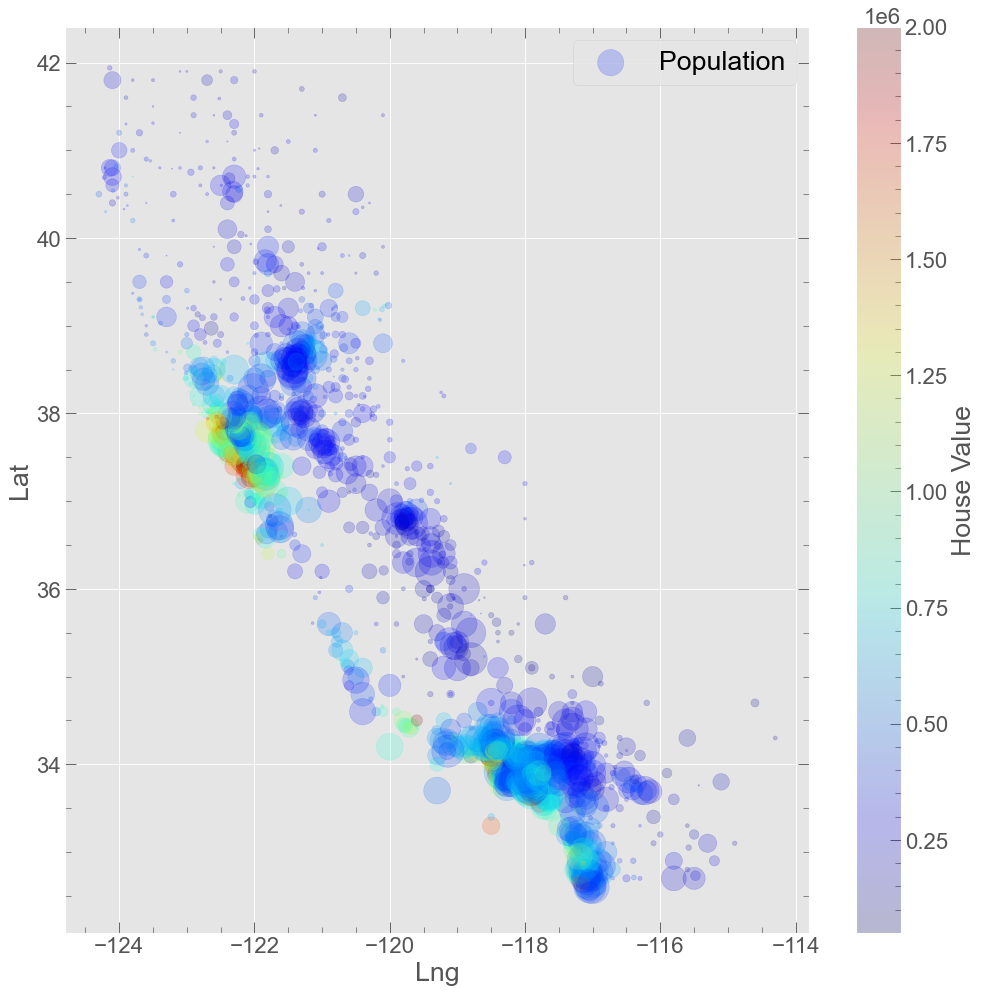

In [27]:
#plotting
fig, ax=plt.subplots(figsize=(15,15))
ca_2019.plot(kind='scatter', x='Lng', y='Lat', alpha=0.2, 
                s=ca_2019['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('jet'),
                colorbar=True, ax=ax)

plt.show()